In [ ]:
import pandas as pd
import gzip
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Books_5.json.gz')

In [ ]:
import sklearn.metrics as metrics
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation, cosine
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
import sys, os
from contextlib import contextmanager

# hahaha (save path & other comments from books recommendation)

In [ ]:
book_rating_filtered_pivot_2= book_rating_filtered.pivot_table(index = 'reviewerID',columns='title', values='overall').fillna(0)

In [ ]:
book_rating_filtered_pivot_2.shape

In [ ]:
X=book_rating_filtered_pivot_2.values.T


In [ ]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD=TruncatedSVD(n_components=12, random_state=17)
matrix=SVD.fit_transform(X)
matrix.shape

In [ ]:
import warnings
warnings.filterwarnings("ignore",category=RuntimeWarning)
corr=np.corrcoef(matrix)
corr.shape

In [ ]:
book_title=book_rating_filtered_pivot_2.columns
book_list=list(book_title)
King = book_list.index("The Iron King")
print(King)

In [ ]:
corr_King = corr[King]

In [ ]:
list(book_title[(corr_King<1.0)&(corr_King>0.9)])

In [ ]:
"""
def findkitems(book_input,k):
    query_index = book_rating_filtered_pivot.index.get_loc(book_input)
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(book_rating_filtered_pivot)#matrix로 돌려도 똑같음!!!!!!!!!!!!!!!

    distances, indices = model_knn.kneighbors(book_rating_filtered_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
    print ('{0} most similar items for item {1}:\n'.format(k,book_rating_filtered_pivot.index[query_index]))
    for i in range(0, len(indices.flatten())): #distance로 돌려도 똑같음!!!!!!!!!!!!!!!!!!!!!
        if indices.flatten()[i]== query_index:
            continue;
        else:
            print( '{0}: {1} :, with similarity of {2}'.format(i,book_rating_filtered_pivot.index[indices.flatten()[i]], similarities.flatten()[i]))
    return similarities,indices """

In [ ]:
book_rating_combined.to_excel(r'C:\Users\hahas\book_rating_combined.xlsx') # raw data

In [ ]:
df_save.to_excel(r'C:\Users\hahas\df_save.xlsx') # raw data

In [ ]:
book_rating_modified_total.to_excel(r'C:\Users\hahas\final.xlsx') # raw data

In [ ]:
book_rating_filtered.to_excel(r'C:\Users\hahas\book_rating_filtered.xlsx') # raw data

In [ ]:
model_knn.fit(book_rating_filtered_matrix) # matrix 아니고 pivot_table 그대로 넣으면?

In [ ]:
print(query_index)
print(distances)
print(indices)
print(model_knn.kneighbors(book_rating_filtered_pivot.iloc[query_index, :].values.reshape(1,-1)))
print(model_knn.kneighbors(book_rating_filtered_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = k))

In [ ]:
print(book_rating_filtered_pivot.index.get_loc("Blink: The Power of Thinking Without Thinking"))
print(book_rating_filtered_pivot.columns.get_loc("A39650P2CZUUC9"))
book_rating_filtered_pivot.shape

Unnamed: 0           0
reviewerID           0
asin                 0
reviewerName      1155
helpful              0
reviewText          21
overall              0
summary              1
unixReviewTime       0
reviewTime           0
dtype: int64


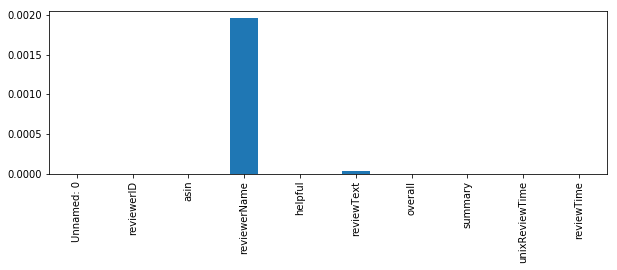

In [62]:
# Check for NULL values: only the rows having NULL are displayed
# Only 'reviewerName' and 'reviewText' contains null value

print(df.isnull().sum())
(df.isnull().sum() / len(df)).plot(kind='bar', figsize=(10, 3))

In [111]:
print(df.head())

         reviewerID        asin  \
1    A2S166WSCFIFP5  000100039X   
57   A2NHD7LUXVGTD3  000100039X   
58   A1K1JW1C5CUSUZ  000100039X   
62   A38AAPXSJN4C5G  000100039X   
151  A281NPSIMI1C2R  000100039X   

                                        reviewerName   helpful  \
1    adead_poet@hotmail.com "adead_poet@hotmail.com"    [0, 2]   
57                                      doc peterson    [1, 1]   
58                Donald Mitchell "Jesus Loves You!"    [3, 4]   
62                                  Edward J. Barton    [0, 0]   
151           Rebecca of Amazon "The Rebecca Review"  [28, 32]   

                                            reviewText  overall  \
1    This is one my must have books. It is a master...    5.000   
57   _The Prophet_ is a short read (my copy checks ...    5.000   
58   The Prophet is about a mysterious religious th...    5.000   
62   Echoing the reviews of others - it is obvious ...    5.000   
151  I am alive like you, and I am standing beside ...   

(590579, 9)
['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime']


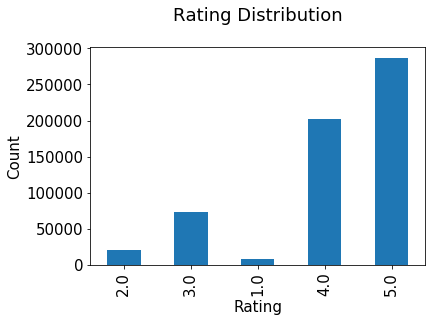

In [112]:
print(df.shape)
print(list(df.columns))
plt.rc("font", size =15)
df.overall.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png',bbox_inches = 'tight')
plt.show()

In [67]:
ratings_sum = pd.DataFrame(df.groupby('asin')['overall'].count())
top10=ratings_sum.sort_values('overall',ascending=False).head(10)
print ("Following books are recommended\n",top10)

Following books are recommended
             overall
asin               
0439023483      146
0143170090      122
0439023513      102
0439136350       99
0143170104       98
0141039280       97
0439023491       93
030758836X       90
0307277674       87
0385660065       86


In [9]:
df_count = pd.DataFrame(df.groupby('asin')['overall'].count())
df_count.sort_values('overall', ascending = False).head()

,overall
asin,
030758836X,7440
0439023483,6717
0375831002,4864
038536315X,4604
0439023513,4440


In [113]:
df[df['asin'].str.match('030758836X')]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
1007071,AU6DIIDZK2OQM,030758836X,A. Luciano,"[2, 2]",On the day of Nick and Amy's fifth wedding ann...,5.000,Twists,1388275200,"12 29, 2013"
1007331,A14R9XMZVJ6INB,030758836X,amf0001,"[0, 0]",Let's ignore the plot for a minute and just lo...,5.000,so beautifully written,1357257600,"01 4, 2013"
1007396,A2QHM5HBSIXRL4,030758836X,Andy Orrock,"[0, 2]",It's difficult to review a book of this nature...,4.000,Worthy successor to 'Dark Places' and 'Sharp O...,1335484800,"04 27, 2012"
1007465,A2AFIEWV1QKF8E,030758836X,Anne Mills,"[0, 0]",Compulsive thriller where most the action stem...,4.000,A Great Thriller With A Cold Heart,1386633600,"12 10, 2013"
1007692,A3N6JG64P2G9EV,030758836X,BarkLessWagMore,"[1, 1]",I'm lazy and everyone knows the plot to this a...,4.000,Very twisty and turny,1374710400,"07 25, 2013"
1007831,A26BVUB2YJMGB7,030758836X,Big D,"[0, 0]","Reading this book reminds me of dog racing, th...",5.000,"Not Great Literature, But What A Story...And S...",1363996800,"03 23, 2013"
1007834,A25HYPL2XKQPZB,030758836X,Bill Garrison,"[1, 2]",GONE GIRL by Gillian Flynn is easily one of th...,5.000,"Sure it has flaws, but I loved it!",1341878400,"07 10, 2012"
1007882,A2CVXUY1EYQGGA,030758836X,Bobbewig,"[1, 1]",I won't spend time summarizing the plot of Gon...,5.000,4 1/2 Stars -- Well Worth Reading!,1389052800,"01 7, 2014"
1007897,A39650P2CZUUC9,030758836X,"Bonnie Brody ""Book Lover and Knitter""","[6, 9]","Gone Girl by Gillian Flynn is a mobius strip, ...",4.000,The Inner Workings of a Marriage Made in Hell,1332806400,"03 27, 2012"
1007925,A1A8QJ282YIUQ0,030758836X,"Book Him Danno ""Book Him Danno""","[0, 0]",You cannot say a lot about this book without g...,4.000,Well worth the read,1348963200,"09 30, 2012"


In [12]:
# Compute the average rating in terms of overall score and rating counts

average_rating=pd.DataFrame(df.groupby('asin')['overall'].mean())
average_rating['ratingCount']= pd.DataFrame(df.groupby('asin')['overall'].count())
average_rating.sort_values('ratingCount',ascending=False).head()
average_rating.sort_values('ratingCount',ascending=False)[0:1000]

,overall,ratingCount
asin,,
030758836X,3.834543,7440
0439023483,4.571684,6717
0375831002,4.588199,4864
038536315X,4.501955,4604
0439023513,4.131081,4440
0316055433,3.787456,4305
0385537859,3.866013,4284
0007444117,3.490709,3821
147674355X,4.660403,3725


In [28]:
user_counts=df['reviewerID'].value_counts()
df=df[df['reviewerID'].isin(user_counts[user_counts>=400].index)]
overall_counts=df['overall'].value_counts()
df=df[df['overall'].isin(overall_counts[overall_counts>=400].index)]

In [29]:
print(df.head())
print(df.shape)

         reviewerID        asin  \
1    A2S166WSCFIFP5  000100039X   
57   A2NHD7LUXVGTD3  000100039X   
58   A1K1JW1C5CUSUZ  000100039X   
62   A38AAPXSJN4C5G  000100039X   
151  A281NPSIMI1C2R  000100039X   

                                        reviewerName   helpful  \
1    adead_poet@hotmail.com "adead_poet@hotmail.com"    [0, 2]   
57                                      doc peterson    [1, 1]   
58                Donald Mitchell "Jesus Loves You!"    [3, 4]   
62                                  Edward J. Barton    [0, 0]   
151           Rebecca of Amazon "The Rebecca Review"  [28, 32]   

                                            reviewText  overall  \
1    This is one my must have books. It is a master...      5.0   
57   _The Prophet_ is a short read (my copy checks ...      5.0   
58   The Prophet is about a mysterious religious th...      5.0   
62   Echoing the reviews of others - it is obvious ...      5.0   
151  I am alive like you, and I am standing beside ...   

In [33]:
ratings_matrix=df.pivot(index='reviewerID',columns='asin',values='overall')
reviewerID = ratings_matrix.index
asin= ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(819, 200985)


asin,000100039X,0001055178,0001712772,000171287X,0001714538,0002005395,0002007649,0002007770,0002051850,0002113570,...,B00LXQIL06,B00LY51TPA,B00LYGQXQY,B00LYM5AUI,B00LYPZJ4M,B00LZ0ZKAE,B00LZ19FE0,B00LZ4D0UC,B00LZKMXBI,B00M0RE7CS
reviewerID,,,,,,,,,,,,,,,,,,,,,
A10DX94ATZQEFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10IKHRUSMKP46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10PEXB6XAQ5XF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10RAGCKPARNMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10XN3J1JEXLTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
ratings_matrix[np.isnan(ratings_matrix)] = 0

In [35]:
ratings_matrix.head()

asin,000100039X,0001055178,0001712772,000171287X,0001714538,0002005395,0002007649,0002007770,0002051850,0002113570,...,B00LXQIL06,B00LY51TPA,B00LYGQXQY,B00LYM5AUI,B00LYPZJ4M,B00LZ0ZKAE,B00LZ19FE0,B00LZ4D0UC,B00LZKMXBI,B00M0RE7CS
reviewerID,,,,,,,,,,,,,,,,,,,,,
A10DX94ATZQEFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10IKHRUSMKP46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10PEXB6XAQ5XF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10RAGCKPARNMI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10XN3J1JEXLTJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
ratings_matrix.to_excel(r'C:\Users\hahas\ratings_matrix.xlsx')

In [42]:
def findksimiaritems(asin,df,metric=metric,k=k):
    similarities=[]
    indices=[]
    df=df.T
    loc = df.index.get_loc(asin)
    model_knn=NearestNeighbors(metric=metric,algorithm='brute')
    model_knn.fit(df)
    distances, indices = model_knn.kneighbors(df.iloc[loc, :].values.reshape(1,-1),n_neighbors=k+1)
    similarities=1-distances.flatten()
    return similarities, indices
    

In [ ]:
cosine_sim = 1-pairwise_distances(ratings_matrix, metric="cosine")

In [ ]:
pd.DataFrame(cosine_sim)

In [ ]:
pearson_sim = 1-pairwise_distances(ratings_matrix, metric="correlation")

In [ ]:
def findksimilaritems(item_id, ratings, metric=metric, k=k):
    similarities=[]
    indices=[]    
    ratings=ratings.T
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)

    distances, indices = model_knn.kneighbors(ratings.iloc[item_id-1, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()
    print ('{0} most similar items for item {1}:\n'.format(k,item_id))
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i]+1 == item_id:
            continue;

        else:
            print( '{0}: Item {1} :, with similarity of {2}'.format(i,indices.flatten()[i]+1, similarities.flatten()[i]))


    return similarities,indices

In [ ]:
similarities,indices=findksimilaritems(1,ratings_matrix)

In [ ]:
def recommendItem(user_id, item_id, ratings):
    
    if user_id<1 or user_id>6 or type(user_id) is not int:
        print ('Userid does not exist. Enter numbers from 1-6')
    else:    
        ids = ['User-based CF (cosine)','User-based CF (correlation)','Item-based CF (cosine)',
               'Item-based CF (adjusted cosine)']

        approach = widgets.Dropdown(options=ids, value=ids[0],
                               description='Select Approach', width='500px')
        
        def on_change(change):
            prediction = 0
            clear_output(wait=True)
            if change['type'] == 'change' and change['name'] == 'value':            
                if (approach.value == 'User-based CF (cosine)'):
                    metric = 'cosine'
                    prediction = predict_userbased(user_id, item_id, ratings, metric)
                elif (approach.value == 'User-based CF (correlation)')  :                       
                    metric = 'correlation'               
                    prediction = predict_userbased(user_id, item_id, ratings, metric)
                elif (approach.value == 'Item-based CF (cosine)'):
                    prediction = predict_itembased(user_id, item_id, ratings)
                else:
                    prediction = predict_itembased_adjcos(user_id,item_id,ratings)

                if ratings[item_id-1][user_id-1] != 0: 
                    print ('Item already rated')
                else:
                    if prediction>=6:
                        print ('\nItem recommended')
                    else:
                        print ('Item not recommended')

        approach.observe(on_change)
        display(approach)

In [ ]:
recommendItem(-1,3,ratings_matrix)

In [ ]:
recommendItem(3,4,ratings_matrix)

In [ ]:
print(user_counts[0:1000])
rating_counts

In [ ]:
df.asin.unique()

In [ ]:
rating_counts_pivot=rating_counts.pivot(index='reviewerID',columns='asin').overall
reviewerID=rating_counts_pivot.index
asin=rating_counts_pivot.columns
print(rating_counts_pivot.shape)
rating_counts_pivot.head()

In [55]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
1,A2S166WSCFIFP5,000100039X,"adead_poet@hotmail.com ""adead_poet@hotmail.com""","[0, 2]",This is one my must have books. It is a master...,5.0,close to god,1071100800,"12 11, 2003"
57,A2NHD7LUXVGTD3,000100039X,doc peterson,"[1, 1]",_The Prophet_ is a short read (my copy checks ...,5.0,a beautiful poetic commentary on what it is to...,1344729600,"08 12, 2012"
58,A1K1JW1C5CUSUZ,000100039X,"Donald Mitchell ""Jesus Loves You!""","[3, 4]",The Prophet is about a mysterious religious th...,5.0,Transcend Human Subjectivity to Find Godlike O...,980380800,"01 25, 2001"
62,A38AAPXSJN4C5G,000100039X,Edward J. Barton,"[0, 0]",Echoing the reviews of others - it is obvious ...,5.0,Inspired and Inspiring,1400630400,"05 21, 2014"
151,A281NPSIMI1C2R,000100039X,"Rebecca of Amazon ""The Rebecca Review""","[28, 32]","I am alive like you, and I am standing beside ...",5.0,The Invisible Revealed,1117411200,"05 30, 2005"


In [ ]:
import pandas as pd

df = pd.read_excel (r'C:\Users\hahas\df.xlsx')
print (df)

In [27]:
columns = ['Unnamed: 0','reviewerName','helpful', 'reviewText','summary', 'unixReviewTime', 'reviewTime']
books_rating=df.drop(columns, axis=1)
books_rating.head()
books_rating.shape

(590579, 3)

In [28]:
books_rating = books_rating.dropna(axis=0,subset=['asin'])
books_rating.shape

(590579, 3)

In [29]:
books_rating = books_rating.dropna(axis=0,subset=['overall'])
books_rating.shape

(590579, 3)

In [30]:
books_ratingCount = (df.groupby(by=['asin'])['overall'].count().reset_index().rename(columns={'overall':"totalRatingcount"})[['asin','totalRatingcount']])
books_ratingCount.head()

,asin,totalRatingcount
0,000100039X,8
1,0001055178,1
2,0001712772,2
3,000171287X,1
4,0001714538,2


In [31]:
rating_with_total_counts=books_rating.merge(books_ratingCount, left_on='asin', right_on='asin')
rating_with_total_counts.head()

,reviewerID,asin,overall,totalRatingcount
0,A2S166WSCFIFP5,000100039X,5,8
1,A2NHD7LUXVGTD3,000100039X,5,8
2,A1K1JW1C5CUSUZ,000100039X,5,8
3,A38AAPXSJN4C5G,000100039X,5,8
4,A281NPSIMI1C2R,000100039X,5,8


In [47]:
pd.set_option('display.float_format',lambda x: '%.3f' %x)
print(books_ratingCount['totalRatingcount'].describe())

count   200985.000
mean         2.938
std          3.668
min          1.000
25%          1.000
50%          2.000
75%          3.000
max        146.000
Name: totalRatingcount, dtype: float64


In [33]:
print(books_ratingCount['totalRatingcount'].quantile(np.arange(.9,1,.01)))

0.900    6.000
0.910    7.000
0.920    7.000
0.930    8.000
0.940    8.000
0.950    9.000
0.960   10.000
0.970   12.000
0.980   14.000
0.990   18.000
Name: totalRatingcount, dtype: float64


In [34]:
popularity_threshold = 50
rating_popular_book = rating_with_total_counts.query('totalRatingcount >= @popularity_threshold')
rating_popular_book.head()

,reviewerID,asin,overall,totalRatingcount
24,A22019GDU7OVFG,0002007770,5,77
25,A3T4KN9XO3PIXG,0002007770,4,77
26,A30H2335OM7RD6,0002007770,5,77
27,A21NVBFIEQWDSG,0002007770,5,77
28,AJQ1S39GZBKUG,0002007770,2,77


In [35]:
rating_popular_book.shape

(3612, 4)

In [48]:
from scipy.sparse import csr_matrix
rating_popular_book_pivot = rating_popular_book.pivot(index='asin',columns='reviewerID',values='overall').fillna(0)
rating_popular_book_matrix=csr_matrix(rating_popular_book_pivot.values) 